# Lecture 3 

Computing in Context: Computational Linguistics

- [X] Parts of speech 
- [X] Brown corpus
- [ ] An easy categorizer
- [X] Distinctive words of categories
- [ ] Intro. Esperanto


In [33]:
import nltk
from nltk.book import *
import pandas as pd

- Nouns: people, places, things
- Adjectives: words that describe something
- Verbs: actions
- Adverbs: -ly
- Prepositions: around, by, of, under
- Conjunctions: and, but


In [5]:
foxTokens = nltk.word_tokenize("The quick brown fox jumped over the lazy dogs.")

In [8]:
foxTags = nltk.pos_tag(foxTokens)

In [10]:
[pair for pair in foxTags if pair[1] == 'NN'] 

[('brown', 'NN'), ('fox', 'NN')]

In [13]:
nltk.pos_tag(nltk.word_tokenize("The frumpiest twiglip scathewed in the greep."))

[('The', 'DT'),
 ('frumpiest', 'JJS'),
 ('twiglip', 'NN'),
 ('scathewed', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('greep', 'NN'),
 ('.', '.')]

In [14]:
mobyNouns = [pair for pair in nltk.pos_tag(text1) if pair[1] == 'NN']  

In [15]:
mobyNouns[:100]

[('pale', 'NN'),
 ('threadbare', 'NN'),
 ('coat', 'NN'),
 ('heart', 'NN'),
 ('body', 'NN'),
 ('brain', 'NN'),
 ('queer', 'NN'),
 ('handkerchief', 'NN'),
 ('gay', 'NN'),
 ('world', 'NN'),
 ('mortality', 'NN'),
 ('hand', 'NN'),
 ('school', 'NN'),
 ('name', 'NN'),
 ('fish', 'NN'),
 ('tongue', 'NN'),
 ('ignorance', 'NN'),
 ('letter', 'NN'),
 ('signification', 'NN'),
 ('word', 'NN'),
 ('animal', 'NN'),
 ('roundness', 'NN'),
 ('rolling', 'NN'),
 ('IAN', 'NN'),
 ('NUEE', 'NN'),
 ('NUEE', 'NN'),
 (').', 'NN'),
 ('burrower', 'NN'),
 ('grub', 'NN'),
 ('worm', 'NN'),
 ('devil', 'NN'),
 ('Sub', 'NN'),
 ('earth', 'NN'),
 ('book', 'NN'),
 ('whatsoever', 'NN'),
 ('profane', 'NN'),
 ('case', 'NN'),
 ('higgledy', 'NN'),
 ('piggledy', 'NN'),
 ('cetology', 'NN'),
 ('ancient', 'NN'),
 ('bird', 'NN'),
 ('eye', 'NN'),
 ('view', 'NN'),
 ('sung', 'NN'),
 ('thee', 'NN'),
 ('devil', 'NN'),
 ('Sub', 'NN'),
 ('commentator', 'NN'),
 ('hopeless', 'NN'),
 ('sallow', 'NN'),
 ('tribe', 'NN'),
 ('wine', 'NN'),
 ('world

In [16]:
mobyTags = nltk.pos_tag(text1)

In [18]:
mobyAdjs = [pair for pair in mobyTags if pair[1] == 'JJ']

In [19]:
mobyAdjs[:50]

[('[', 'JJ'),
 ('Late', 'JJ'),
 ('old', 'JJ'),
 ('old', 'JJ'),
 ('whale', 'JJ'),
 ('true', 'JJ'),
 ('Librarian', 'JJ'),
 ('mere', 'JJ'),
 ('poor', 'JJ'),
 ('long', 'JJ'),
 ('random', 'JJ'),
 ('whale', 'JJ'),
 ('authentic', 'JJ'),
 ('veritable', 'JJ'),
 ('gospel', 'JJ'),
 ('valuable', 'JJ'),
 ('entertaining', 'JJ'),
 ('s', 'JJ'),
 ('many', 'JJ'),
 ('own', 'JJ'),
 ('fare', 'JJ'),
 ('poor', 'JJ'),
 ('rosy', 'JJ'),
 ('strong', 'JJ'),
 ('poor', 'JJ'),
 ('convivial', 'JJ'),
 ('full', 'JJ'),
 ('empty', 'JJ'),
 ('unpleasant', 'JJ'),
 ('much', 'JJ'),
 ('much', 'JJ'),
 ('long', 'JJ'),
 ('pampered', 'JJ'),
 ('ye', 'JJ'),
 ('unsplinterable', 'JJ'),
 ('great', 'JJ'),
 ('hoary', 'JJ'),
 ('great', 'JJ'),
 ('great', 'JJ'),
 ('strong', 'JJ'),
 ('s', 'JJ'),
 ('foul', 'JJ'),
 ('great', 'JJ'),
 ('Indian', 'JJ'),
 ('great', 'JJ'),
 ('many', 'JJ'),
 ('other', 'JJ'),
 ('former', 'JJ'),
 ('monstrous', 'JJ'),
 ('open', 'JJ')]

In [26]:
brownCategories = nltk.corpus.brown.categories()

Goal: create a dictionary where the category label is the key, 
and the value is the list of words. 

{"adventure": ['adventure', 'words', 'here'...] ... }

In [29]:
brownDict = {cat: nltk.corpus.brown.words(categories=cat) for cat in brownCategories}

In [30]:
brownDict.keys()

dict_keys(['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'])

In [32]:
brownDict['science_fiction'][:200]

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

In [57]:
brownFreqs = {cat: nltk.FreqDist([w.lower() for w in words]) for cat, words in brownDict.items()}

In [58]:
fruit = {'apples': 5, 'bananas': 10}

In [59]:
fruit.items()

dict_items([('apples', 5), ('bananas', 10)])

In [107]:
brownDf = pd.DataFrame(brownFreqs)

In [108]:
brownDf = brownDf.fillna(0)

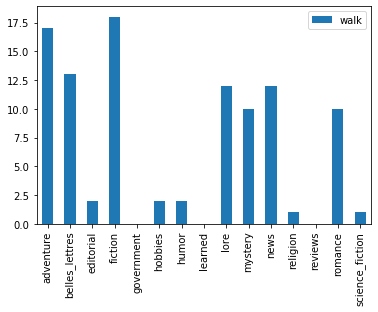

In [109]:
brownDf.loc[['walk']].T.plot(kind='bar')

In [110]:
brownSents = {cat: nltk.corpus.brown.sents(categories=cat) for cat in brownCategories}

## Distinctive words

Keywords, MDW (most distinctive words). 


In [111]:
brownDf = brownDf.T

In [112]:
brownWords = {cat: nltk.corpus.brown.words(categories=cat) for cat in brownCategories}

In [113]:
brownLengths = {cat: len(words) for cat, words in brownWords.items()} 

In [114]:
brownLengths

{'adventure': 69342,
 'belles_lettres': 173096,
 'editorial': 61604,
 'fiction': 68488,
 'government': 70117,
 'hobbies': 82345,
 'humor': 21695,
 'learned': 181888,
 'lore': 110299,
 'mystery': 57169,
 'news': 100554,
 'religion': 39399,
 'reviews': 40704,
 'romance': 70022,
 'science_fiction': 14470}

In [115]:
brownLengths.values()

dict_values([69342, 173096, 61604, 68488, 70117, 82345, 21695, 181888, 110299, 57169, 100554, 39399, 40704, 70022, 14470])

In [120]:
justValues = list(brownLengths.values())

In [125]:
brownProps = brownDf.T / justValues

In [129]:
brownProps = brownProps.T

In [131]:
brownProps.mean()

dan           0.000025
morgan        0.000053
told          0.000402
himself       0.000592
he            0.009285
                ...   
cow-man       0.000005
cow-people    0.000005
kindliness    0.000005
commingled    0.000005
b'dikkat's    0.000005
Length: 49815, dtype: float64

In [132]:
brownAverages = brownProps.mean()

In [133]:
adventureWords = (brownProps.loc['adventure'] - brownAverages)

In [135]:
adventureWords.sort_values(ascending=False).head(40)

.        0.014329
he       0.009218
his      0.005819
''       0.005284
``       0.005279
was      0.004094
i        0.004058
her      0.003650
had      0.003458
him      0.003345
you      0.002726
!        0.002712
she      0.002491
?        0.002321
said     0.002111
out      0.001925
me       0.001817
back     0.001421
up       0.001419
down     0.001354
my       0.001280
man      0.001235
it       0.001100
they     0.001096
eyes     0.000991
into     0.000975
on       0.000853
were     0.000794
like     0.000765
a        0.000705
face     0.000701
get      0.000688
then     0.000680
got      0.000671
door     0.000657
over     0.000656
off      0.000643
could    0.000631
saw      0.000623
don't    0.000618
dtype: float64

In [136]:
romanceWords = (brownProps.loc['romance'] - brownAverages)

In [139]:
romanceWords.sort_values(ascending=True).head(40)

the     -0.015067
of      -0.011891
is      -0.005538
in      -0.003887
by      -0.002482
are     -0.002298
as      -0.001730
this    -0.001660
for     -0.001659
has     -0.001610
)       -0.001565
(       -0.001517
which   -0.001326
will    -0.001109
;       -0.001093
be      -0.001057
or      -0.001000
may     -0.000885
an      -0.000812
we      -0.000770
:       -0.000749
these   -0.000748
new     -0.000744
such    -0.000741
our     -0.000654
from    -0.000586
to      -0.000585
who     -0.000580
also    -0.000578
their   -0.000561
state   -0.000556
on      -0.000555
more    -0.000547
its     -0.000514
most    -0.000513
than    -0.000504
many    -0.000468
other   -0.000416
af      -0.000408
two     -0.000403
dtype: float64